<a href="https://colab.research.google.com/github/yaman9675/understand_Airbnb/blob/main/understand_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# <center> Understand Airbnb Data 🎲 </center>

---

<center><img src = "https://images.ctfassets.net/wrfb3hbaoyr0/53u5lL1hAQG4YmeagaKC6I/e871471524966764eb7a3456eef83591/hydrant_16-9.gif"></center>

---

---

# Description of the data

**Context:**

><i> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.</i>

**Content:**

><i> This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.</i>

**Acknowledgements:**

><i> This public dataset is part of Airbnb, and the original source can be found on this <a href="http://insideairbnb.com/">website</a>.</i>

**Inspiration:**

 * What can we learn about different hosts and areas?
 * What can we learn from predictions? (ex: locations, prices, reviews, etc)
 * Which hosts are the busiest and why?
 * Is there any noticeable difference of traffic among different areas and what could be the reason for it?
 
 ---
 
 # Project description
 
 **Objective:**
 
 ><i> In this <b>project</b>, I will perform a <b>descriptive</b> and <b>exploratory</b> analysis of the data, in order to understand how the phenomena of each variable behave individually and transversely, in addition to to generate <b>hypotheses</b> useful for future <b>decision-making </b>. The whole analysis will follow a simple and direct structure, well detailed in all topics, aiming at the same time, to create an intuitive and simple <b> guide </b> of which steps must be followed to carry out a good analysis, to in order to understand the data involved in any study.</i>
 
 **Methods:**
 
 ><i>To perform this work, I will use <b>statistical</b> techniques very common in any type of analysis, simple or complex, such as <b>classification of variables</b>, <b>frequency distribution tables</b>, <b>histograms</b>, <b>measures of central tendency</b> and etc. The following is an outline of each topic carried out in this analysis, which will serve as guidance for this project.</i>
 
 ---

---

# 1. Libraries & Data loading <br>

In [ ]:
!pip install pycountry


     |████████████████████████████████| 10.1 MB 2.2 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=b7c86fbba48c21115061d6de6c2d7b5445852695589633dd39d164aefef0ddff
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
!pip install klib

     |████████████████████████████████| 133 kB 9.3 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import klib         #librarie to make a visualization of all the column 
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math        #used to perform math on scalar data
from numpy import loadtxt     #fast reader for simple text files
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.image as mpimg      # for reading image as an array
import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px
from scipy.stats import pearsonr
import folium
import warnings
warnings.filterwarnings('ignore')   #we importing this lib because we are filtering tha data lot so don't feel struck just go on 

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Capston Project Help/Airbnb NYC 2019.csv'
airbnb = pd.read_csv(file_path)

### Using klib Python library for importing, cleaning, analyzing and preprocessing data.

In [ ]:
#Categorical Data Plot
klib.cat_plot(airbnb)

In [ ]:
#correlation graph among columns
klib.corr_plot(airbnb)

In [ ]:
# default representation of a distribution plot, other settings include fill_range, histogram, ...
klib.dist_plot(airbnb)

In [ ]:
# default representation of missing values in a DataFrame, plenty of settings are available
klib.missingval_plot(airbnb)

# Data Summary

In [ ]:
#number of rows, number of columns
airbnb.shape

In [ ]:
#the total number of elements in the array. 
airbnb.size

In [ ]:
#read first five row  of data 
airbnb.head()

In [ ]:
#read last five row  of data 
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#total count null values
airbnb.isnull().values.sum()

20141

In [ ]:
#Name of columns we have in our data base 
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#value through we are goin to deal
airbnb.describe()

In [ ]:
# data information we have
airbnb.info()

---

# 2. Descriptive Analysis

><i> Generally, <b>descriptive analyzes</b> are the first manipulations performed in a <b>quantitative</b> study and their main objective is to summarize and explore the behavior of the data involved in the study. Using statistical techniques such as <b>frequency distribution</b>, <b>measures of central tendency</b> and <b>measures of dispersion</b> we can better understand the way in which the phenomena under study behave.</i>

## A. Variable types

><i> In a <b>quantitative</b> study, it is very important to know what types of data are being studied, because for different types of data different analyzes are performed. The data is divided into two main types: <b>quantitative</b> and <b>qualitative</b>. We can describe them as follows:</i>

**Variáveis Qualitativas**

><i> Qualitative (or categorical) variables are characteristics that cannot be measured numerically, for example: Sex, Gender, Color and education. And they can be <b>nominal</b> or <b>ordinal</b>.</i>

**Variáveis Quantitativas**

><i> The variables classified as quantitative are the characteristics that can be measured on a quantitative scale, that is, they present numerical values that make sense, for example: <b>Height</b>, <b> Mass</b>, <b>Income</b> and <b>Age</b>.</i>

---

<center><img src = "https://i.stack.imgur.com/3QemG.gif"></center>

<a id="tipos"></a>

### Nominal Qualitative

* > <i><b>Nominal qualitative variables</b> are the characteristics that do not rank among the categories, for example: <b>Sex</b>, <b>Color</b> and <b>Gender</b>. The data set variables that belong to this type are: <b>neighbourhood_group</b>, <b>neighbourhood</b> e <b>room_type</b>.</i>

**The unique values of the attributes classified as nominal qualitative are below:**

In [ ]:
airbnb["neighbourhood_group"].nunique()

In [ ]:
airbnb["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb["neighbourhood"].nunique()

In [ ]:
airbnb["neighbourhood"].unique()

In [ ]:
airbnb["room_type"].nunique()

In [ ]:
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Discrete Quantitative

><i> Variables are classified as <b>quantitative discrete</b> when the set of possible results is finite or enumeral. The variables of the data set under analysis that belong to this category are: <b>minimum_nights</b>, <b>calculated_host_listings_count</b> and <b>price</b>.</i>

<font color = "red"><b>Note:</b></font>

><i> The price attribute is generally classified as continuous quantitative, but as in our data set the values are represented only with integer values, we will treat it as discrete.</i>

**All variables classified as discrete quantitative have only integer values.**

In [ ]:
airbnb["minimum_nights"].nunique()

109

In [ ]:
airbnb["minimum_nights"].unique()

In [ ]:
print(airbnb['price'].min())
print(airbnb['price'].max())

### Continuous Quantitative

> Variables are classified as <b>continuous quantitative</b> when values are expressed as a range or union of whole numbers. The attributes of the database under study that belong to this category are: <b>latitude </b> and <b>longitude</b>.

In [ ]:
print(airbnb['latitude'].min())
print(airbnb['latitude'].max())
print(airbnb['longitude'].min())
print(airbnb['longitude'].max())

40.49979
40.91306
-74.24442
-73.71299


## B. Frequency Distribution

><i> The first step in an <b>analysis</b> work is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as <b>frequency distribution tables</b>, <b>histograms</b> and <b>bar graphs</b> we can better understand how the phenomena under study are distributed.</i>

---

<font color = "red"><b>Note: </b></font>

><i> In statistics, the frequency distribution is an arrangement of values that one or more variables take in a sample. Each entry in the table contains the frequency or count of occurrences of values within a specific group or range, and so the table summarizes the distribution of the sample values.</i>

---

> The technique used to create the Percent column uses the following formula:

p -> Percent

Freq_x -> Frequency of an element x

$\sum_{i=0}^{n}(Freq_i)$ -> Sum of all frequencies

---

> ## $p = 100 * \frac{Freq_x}{\sum_{i=0}^{n}(Freq_i)}$

---

<a id="freq"></a>

In [ ]:
#neighbourhood_group
neighbourhood_group_freq = airbnb["neighbourhood_group"].value_counts().reset_index()
neighbourhood_group_freq['percent'] = neighbourhood_group_freq['neighbourhood_group']*100/(len(airbnb['neighbourhood_group']))
area_freq = neighbourhood_group_freq.rename(columns = {'index':'neighbourhood_group', 'neighbourhood_group':'count'})

In [ ]:
area_freq

,neighbourhood_group,count,percent
0,Manhattan,21661,44.301053
1,Brooklyn,20104,41.116679
2,Queens,5666,11.588097
3,Bronx,1091,2.231312
4,Staten Island,373,0.762859


<BarContainer object of 5 artists>

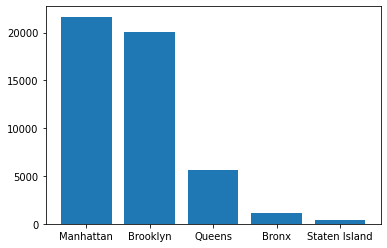

In [ ]:
x = area_freq['neighbourhood_group']
y = area_freq['count']
plt.bar(x,y)

In [ ]:
#polar graph to be draw

---

**most frequent neighbourhood group**

 * 1° Manhattan -> 21661(<font color = "green"><b>44.30%</b></font>)
 * 2° Brooklyn -> 20104(<font color = "green"><b>41.11%</b></font>)
 * 3° Queens -> 5666(<font color = "green"><b>11.58%</b></font>)
 * 4° Bronx -> 1091(<font color = "green"><b>2.23%</b></font>)
 * 5° Staten Island -> 373(<font color = "green"><b>0.76%</b></font>)
 
 ---

In [ ]:
#neighbourhood
neighbourhood = airbnb["neighbourhood"].value_counts().reset_index()
neighbourhood['percent'] = neighbourhood['neighbourhood']*100/(len(airbnb['neighbourhood']))
neighbourhood_freq = neighbourhood.rename(columns = {'index':'neighbourhood', 'neighbourhood':'count'})

In [ ]:
neighbourhood_freq

,neighbourhood,count,percent
0,Williamsburg,3920,8.017180
1,Bedford-Stuyvesant,3714,7.595869
2,Harlem,2658,5.436139
3,Bushwick,2465,5.041415
4,Upper West Side,1971,4.031087
...,...,...,...
216,Fort Wadsworth,1,0.002045
217,Richmondtown,1,0.002045
218,New Dorp,1,0.002045
219,Rossville,1,0.002045


---

### Bar graphs

<font color = "red"><b>Note: </b></font>

><i> The <b>bar graph</b> is a graph with rectangular bars and length proportional to the values it displays. The bars can be drawn vertically or horizontally. This type of representation uses both vertical and horizontal bars to illustrate comparisons.</i>

> **Room type**

><i> Here, we will basically extract the information from the <b>frequency distribution</b> table of the <b>room_type</b> variable and generate a bar chart comparing the frequency of each category, thus making it easier to understand how these categories are distributed.</i>

In [ ]:
#rooms_type
room_freq = airbnb['room_type'].value_counts().reset_index()
room_freq['percent'] = room_freq['room_type']*100/(len(airbnb['room_type']))
room_type = room_freq.rename(columns = {'index':'room_type', 'room_type':'count'})

In [ ]:
room_type

,room_type,count,percent
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


<BarContainer object of 3 artists>

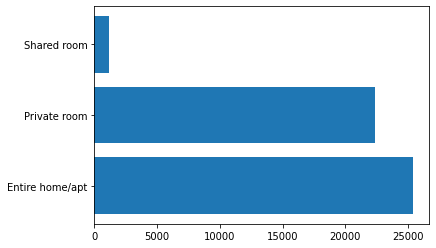

In [ ]:
x = room_type['room_type']
y = room_type['count']
plt.barh(x, y,)

In [ ]:
#Bar chart on polar axis remaining

---

><i> With the frequency tables created above, we can conclude that the frequency and the representative percentage of the three most frequent categories of the categorical variables <b>neighborhood_group</b>, <b>neighborhood</b> and <b>room_type</b> are:</i>

**neighbourhood_group/Location**

 * 1° Manhattan -> 21661(<font color = "green"><b>44.30%</b></font>)
 * 2° Brooklyn ->  20104(<font color = "green"><b>41.11%</b></font>)  
 * 3° Queens ->    5666(<font color = "green"><b>11.58%</b></font>)

**neighbourhood/Area**

 * 1° Williamsburg ->        3920(<font color = "green"><b>8.01%</b></font>)
 * 2° Bedford-Stuyvesant ->  3714(<font color = "green"><b>7.59%</b></font>)  
 * 3° Harlem ->              2658(<font color = "green"><b>5.43%</b></font>)

**room_type/listing space type**
   
 * 1° Entire home/apt ->    25409(<font color = "green"><b>51.96%</b></font>)
 * 2° Private room ->       22326(<font color = "green"><b>45.66%</b></font>)  
 * 3° Shared room ->        1160(<font color = "green"><b>2.37%</b></font>)

---

### Frequency Distribution Tables for quantitative variables

><i> In order to obtain the frequency distribution tables for the <b>minimum_nights</b> and <b>price</b> variables, I will use a technique that creates fixed amplitude classes for quantitative variables, details of this technique are below:</i>

**Sturges Rule**

## $k = 1 + \frac{10}{3}log_{10}n$

---

<font color = "red"><b>Note: </b></font>

><i> The <b>Sturges rule</b> is an empirical method widely used in descriptive statistics to determine the number of classes that must exist in a frequency histogram, in order to classify a data set representing a sample or population.</i>

**minimum_nights**

> amount of nights minimum

In [ ]:
#nights
frequency, bins = np.histogram(airbnb['minimum_nights'], bins=17, range=[0, 1260])
print(frequency)
print(bins)

[48577   184    68     9    45     1     6     0     0     0     0     0
     0     4     0     0     1]
[   0.           74.11764706  148.23529412  222.35294118  296.47058824
  370.58823529  444.70588235  518.82352941  592.94117647  667.05882353
  741.17647059  815.29411765  889.41176471  963.52941176 1037.64705882
 1111.76470588 1185.88235294 1260.        ]


In [ ]:
nights = pd.DataFrame(data={'range' :['0-74', '74-148', '148-222', '222-296', '296-370', '370-444', '444-518', '518-592', 
                                      '592-667', '667-741', '741-815', '815-889', '889-963', '963-1037', '1037-1111','1111-1185', '1185-1260'],
                             'frequency':[48577, 184, 68, 9, 45, 1, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1]})
        
nights['percentage'] = nights['frequency']*100/(nights['frequency'].sum())

In [ ]:
nights

,range,frequency,percentage
0,0-74,48577,99.349627
1,74-148,184,0.376317
2,148-222,68,0.139074
3,222-296,9,0.018407
4,296-370,45,0.092034
5,370-444,1,0.002045
6,444-518,6,0.012271
7,518-592,0,0.000000
8,592-667,0,0.000000
9,667-741,0,0.000000


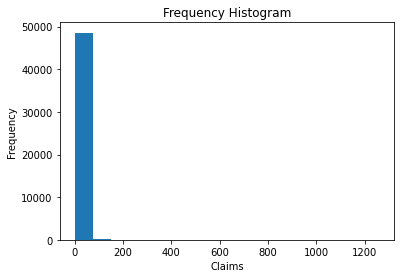

In [ ]:
plt.hist(airbnb['minimum_nights'], bins=17, range=[0, 1260])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

---

><i> Using the <b>sturges rule</b> to create the frequency table above, we can see that 48,577(<font color = "green"><b>99.34%</b></font>) of the reserves made on <font color = "blue"><b>airbnb</b></font> are for a minimum number of nights between <b>1 to 73,47</b>. This type of information is very useful for our analysis.</i>

---

In [ ]:
nights_40 = airbnb[airbnb['minimum_nights'] <= 40]

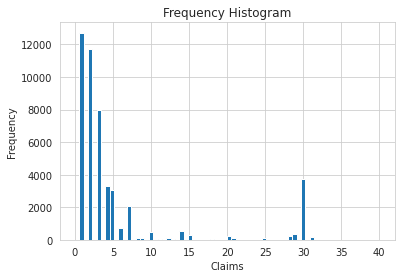

In [ ]:
plt.hist(nights_40['minimum_nights'], bins=70, range=[0, 40])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

><i> In the same way as in the frequency table, but now viewing through a histogram, we can see that the minimum number of nights for all reservations made on <font color = "blue"><b>airbnb</b></font> are concentrated below <b>10</b> with a small peak at <b>30</b>.Recapping an important information from the frequency table of the variable <b> minimum_nights </b>, we have to: we can see that 48,577(<font color = "green"><b>99.34%</b></font>) of the reserves made on <font color = "blue"><b>airbnb</b></font> are for a minimum number of nights between <b>1 to 73,47</b>.</i>

---

**price**

> price in dollars

In [ ]:
#price
frequency_pr, bins_pr = np.histogram(airbnb['price'], bins=17, range=[0, 10000])
print(frequency_pr)
print(bins_pr)

[47994   691    89    43    21    16    10     5     8     0     3     4
     2     2     1     0     6]
[    0.           588.23529412  1176.47058824  1764.70588235
  2352.94117647  2941.17647059  3529.41176471  4117.64705882
  4705.88235294  5294.11764706  5882.35294118  6470.58823529
  7058.82352941  7647.05882353  8235.29411765  8823.52941176
  9411.76470588 10000.        ]


In [ ]:
price = pd.DataFrame(data={'range' :['0-588', '588-1176', '1176-1764', '1764-2352', '2353-2941', '2941-3529', '3529-4117', '4117-4705', '4705-5294', 
                                    '5294-5882', '5882-6470', '6470-7058', '7058-7647', '7647-8235', '8235-8823', '8823-9411', '9411-10000'],
                             'frequency':[47994, 691, 89, 43, 21, 16, 10, 5, 8, 0, 3, 4, 2, 2, 1, 0, 6]})
        
price['percentage'] = price['frequency']*100/(price['frequency'].sum())

In [ ]:
price

,range,frequency,percentage
0,0-588,47994,98.157276
1,588-1176,691,1.413232
2,1176-1764,89,0.182023
3,1764-2352,43,0.087944
4,2353-2941,21,0.042949
5,2941-3529,16,0.032723
6,3529-4117,10,0.020452
7,4117-4705,5,0.010226
8,4705-5294,8,0.016362
9,5294-5882,0,0.000000


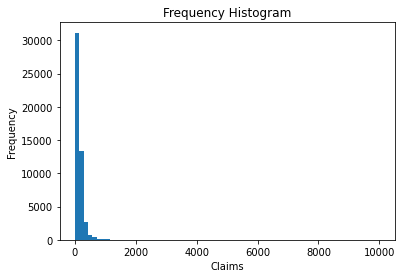

In [ ]:
plt.hist(airbnb['price'], bins=70, range=[0, 10000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

---

><i> Of all bookings made on <font color = "blue"><b>airbnb</b></font> a total of 47 994(<font color = "green"><b>98.15%</b></font>) are priced less than or equal to 58.823 dollars and 691(<font color = "green"><b>1.41%</b></font>) are between <b>58,823</b> and <b>117,647 </b>dollars.</i>

---

><i>I will not create frequency distribution tables for the <b>latitude</b> and <b>longitude</b> attributes, as this would not make much sense for our analysis.</i>

In [ ]:
price_1000 = airbnb[airbnb['price'] <= 1000]

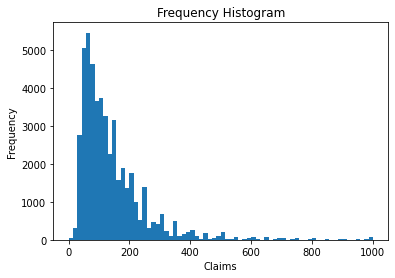

In [ ]:
plt.hist(price_1000['price'], bins=70, range=[0, 1000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

><i> As we have seen in the frequency distribution table of the price variable, but now using a histogram, we can see how the prices are distributed, we notice that the largest concentration of values is below 200 dollars, and as we have seen in the table we have whereas a total of 47 994 (<font color = "green"><b>98.15%</b></font>) of reserves are between <b>0</b> and <b>58,823 dollars</b>.</i>

---

> **The 10 most frequent neighbourhood**

><i> In the <b>neighborhood</b> variable we have a total of <b>221 unique categories</b>, so we will see only the <b>10</b> most frequent categories. Below the graph I will describe in descending order the 10 most frequent categories of the <b>neighborhood</b> attribute.</i>

In [ ]:
#Total number of unique neighbourhood
airbnb['neighbourhood'].nunique()

221

In [ ]:
#The 10 most frequent neighbourhood
neighbourhood_10 = airbnb['neighbourhood'].value_counts().reset_index().head(10)
most_frequent_neighbourhood = neighbourhood_10.rename(columns = {'index':'neighbourhood', 'neighbourhood':'count'})

In [ ]:
most_frequent_neighbourhood

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


<BarContainer object of 10 artists>

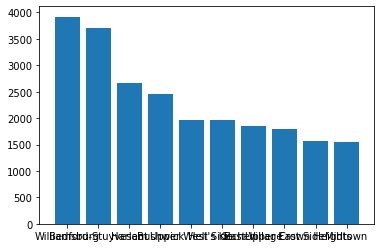

In [ ]:
x = neigh_top_10['neighbourhood']
y = neigh_top_10['count']
plt.bar(x, y)

><i> With the frequency distribution table and the bar graph that facilitates our interpretation of how the categories of certain variables are distributed, we can filter many important information, but first we have to know what the <font color = "blue"><b>airbnb</b></font> company is about, I will leave a quick description, if you want to know more information about the company <a href="https://www.airbnb.com.br/">click here</a>.</i>

---

**Descrição Airbnb**

><i> <font color = "blue"><b>airbnb</b></font> is a community online service for people to advertise, discover and book accommodation.</i>

---

><i> From many questions that arise from an analysis, here we can answer the following: Of all <b>221 neighborhoods</b>, which is the most requested by customers for advertisements and accommodation reservations on the <font color = "blue"><b>airbnb</b></font> website?</i>

**The 10 most frequent neighbourhood**

 * 1° Williamsburg -> 3920(<font color = "green"><b>8.01%</b></font>)
 * 2° Bedford-Stuyvesant -> 3714(<font color = "green"><b>7.59%</b></font>)
 * 3° Harlem -> 2658(<font color = "green"><b>5.43%</b></font>)
 * 4° Bushwick -> 2465(<font color = "green"><b>5.04%</b></font>)
 * 5° Upper West Side -> 1971(<font color = "green"><b>4.03%</b></font>)
 * 6° Hell's Kitchen -> 1958(<font color = "green"><b>4.00%</b></font>)
 * 7° East Village -> 1853(<font color = "green"><b>3.78%</b></font>)
 * 8° Upper East Side -> 1798(<font color = "green"><b>3.67%</b></font>)
 * 9° Crown Heights -> 1564(<font color = "green"><b>3.19%</b></font>)
 * 10° Midtown -> 1545(<font color = "green"><b>3.15%</b></font>)
 
---

## C. Central Trend Measures

<font color = "red"><b>Note: </b></font>

><i> In <b>statistics</b>, a central trend is a central value or a typical value for a probability distribution. The most common measures of central tendency are the <b>arithmetic mean</b>, the <b>median</b> and the <b>mode</b>.</i>

<a id="medidas"></a>

### Mean

<font color = "red"><b>Note: </b></font>

><i> In <b>statistics</b>, <b>mean</b> is defined as the value that shows the concentration of the data in a distribution, as the equilibrium point of the frequencies in a histogram. Average is also interpreted as a significant value in a list of numbers.</i>

> ## $\frac{1}{n}\sum_{i=0}^{n}X_i$

In [ ]:
print(airbnb['price'].mean())
airbnb['minimum_nights'].mean()

152.7206871868289


7.029962163820431

### Median

<font color = "red"><b>Note: </b></font>

><i> <b>Median</b> is the value that separates the major and minor half of a sample, population or probability distribution. In simpler terms, median can be the middle value of a data set. In the data set <b>{1, 3, 3, 6, 7, 8, 9}</b>, for example, the median is <b>6</b>.</i>

---

<center><img src = "https://www.mhnederlof.nl/images/median.jpg"></center>

In [ ]:
print(airbnb['price'].median())
airbnb['minimum_nights'].median()

106.0


3.0

### Mode

<font color = "red"><b>Note: </b></font>

><i><b>Mode</b> is one of the measures of height of a data set, as well as the mean and the median. It can be defined in sample and population fashion. In relation to the first one, the sampling mode of a data set deals with the value that occurs most frequently or the most common value in a data set. </i>


In [ ]:
print(airbnb['price'].mode())
airbnb['minimum_nights'].mode()

0    100
dtype: int64


0    1
dtype: int64

### Relationships between central tendency measures

><i> Understanding the relationships that exist between measures of central tendency helps us to identify whether a particular variable is symmetric or asymmetric, as well as whether it has strong candidates for outliers, we will visualize the relationships between these metrics of the variables <b>Price</b> and <b>Minimum nights</b>.</i>

---

<center><img src="https://keydifferences.com/wp-content/uploads/2016/04/mean-vs-median.jpg"></center>

<font color = "red"><b>Note: </b></font>

> The entire <b>sample</b> was used to obtain each metric below, even though the graphs below are limited to an interval, the upper limit helps in visualization and therefore facilitates understanding. 

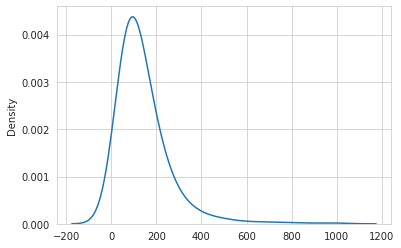

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(price_1000['price']), bw=0.5)

In [ ]:
#plar plot

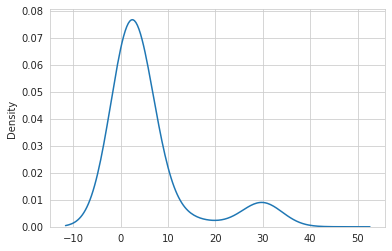

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(nights_40['minimum_nights']), bw=0.5)

In [ ]:
#polar plot

> We have then that both the <b>price</b> and <b>minimum_nights</b> variables are asymmetric on the right, to identify whether a given variable is asymmetric on the right only with the <b>mean</b>, <b>median</b> and <b>mode</b> values. the following rules:

---

**Asymmetric Right**

### $Mode < Median < Mean $

**Asymmetric Left**

### $Mode > Median > Mean $

**Symmetrical**

### $Mode = Median = Mean $

---

---

## D. Separating Measures

><i> <b>Separator measures</b> are real numbers that divide the ordered sequence of data into parts that contain the same number of elements in the series. Thus, the <b>median</b> that divides the ordered sequence into two groups, each containing <font color = "green"><b>50%</b></font> of the sequence values, is also a separating measure.</i>

<a id="separatriz"></a>

**Quartile**

><i> In <b>descriptive statistics</b>, a <b>quartile</b> is any of the three values that divide the ordered set of data into four equal parts, and so each part represents <b>1/4</b> of the sample or population.</i>

In [ ]:
quartis_q1 = np.percentile(airbnb['minimum_nights'],25)
quartis_q2 = np.percentile(airbnb['minimum_nights'],50)
quartis_q3 = np.percentile(airbnb['minimum_nights'],75)
quartis_q4 = np.percentile(airbnb['minimum_nights'],99)

quartis_p1 = np.percentile(airbnb['price'],25)
quartis_p2 = np.percentile(airbnb['price'],50)
quartis_p3 = np.percentile(airbnb['price'],75)
quartis_p4 = np.percentile(airbnb['price'],99)

print(f'Minimum_Nights Quartiles Q1 = {quartis_q1}, Q2 = {quartis_q2}, Q3 = {quartis_q3}, Q4 = {quartis_q4}')
print(f'Price Quartiles Q1 = {quartis_p1}, Q2 = {quartis_p2}, Q3 = {quartis_p3}, Q4 = {quartis_p4}')

Minimum_Nights Quartiles Q1 = 1.0, Q2 = 3.0, Q3 = 5.0, Q4 = 45.0
Price Quartiles Q1 = 69.0, Q2 = 106.0, Q3 = 175.0, Q4 = 799.0


><i> We can take some useful information in an analysis of <b>separate measures</b>, as well as answer many questions about the data set under study. Some important points that you can describe in relation to the type of analysis are:</i>

---

 * 1°

><i> <font color = "green"><b>25.00%</b></font> of bookings made on <font color = "blue"><b>airbnb</b></font> are of values equal to or less than <b>69</b> dollars and <b>1</b> minimum night.</i>

 * 2°

><i> <font color = "green"><b>50.00%</b></font> of bookings made on <font color = "blue"><b>airbnb</b></font> are of values equal to or less than <b>106</b> dollars and <b>3</b> minimum nights. </i>

 * 3°

><i> <font color = "green"><b>75.00%</b></font> of bookings made on <font color = "blue"><b>airbnb</b></font> are of values equal to or less than <b>175</b> dollars and <b>5</b> minimum nights.</i>

 * 4°

><i> <font color = "green"><b>99.00%</b></font> of bookings made on <font color = "blue"> <b> airbnb </b> </font> are of values equal to or less than <b> 799 </b> dollars and <b> 45 </b> minimum nights, meaning only <font color = "green"> <b> 1.0% </b> </font> of bookings are of values above <b> 799 </b> dollars with a maximum value of <b> 10000 </b> dollars and <b> 1250 </b> minimum nights. </i>

---

<font color = "red"><b>Note: </b></font>

><i> We can see that the values above <font color = "green"> <b> 99.00% </b> </font> of the attributes <b> minimum_nights </b> and <b> price </b> have very strange values, but I will not make any decision, as this is not the objective of this work. In order to have more information about these values and to make decisions, a more precise investigation is needed to verify if these values with the upper limit of <b> 10000 </b> dollars and <b> 1250 </b> minimum nights are indeed in fact outliers or not.</i>

**Violin**

><i> A <b>violin plot</b> is a method of plotting numerical data. It is similar to a box plot, with the addition of a kernel density plot rotated on each side.</i>


In [ ]:
min_night_price = airbnb.groupby('minimum_nights')['price'].mean().reset_index()
min_night_price['pr_percent'] = min_night_price['price']*100/(airbnb['price'].sum())

In [ ]:
min_night_price = airbnb.groupby('minimum_nights')['price'].sum().reset_index()
min_night_price['pr_percent'] = min_night_price['price']*100/(airbnb['price'].sum())

In [ ]:
min_night_price.head(12)

,minimum_nights,price,pr_percent
0,1,1806531,24.192631
1,2,1710776,22.910303
2,3,1281850,17.166228
3,4,532416,7.129988
4,5,477281,6.391633
5,6,128154,1.716208
6,7,290575,3.891311
7,8,15533,0.208014
8,9,9719,0.130155
9,10,64666,0.865992


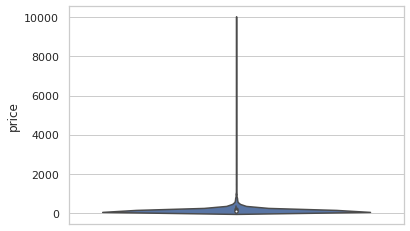

In [ ]:
#price vilon graph
ax = sns.violinplot(y=airbnb['price'])

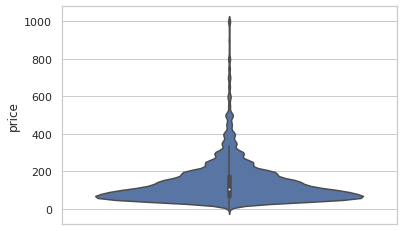

In [ ]:
ax = sns.violinplot(y=price_1000['price'])

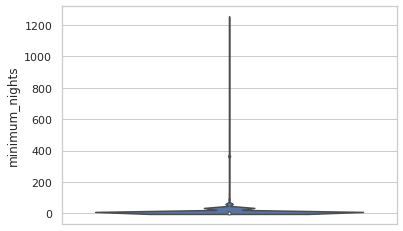

In [ ]:
#minimum_nights vilon graph
ax = sns.violinplot(y=airbnb['minimum_nights'])

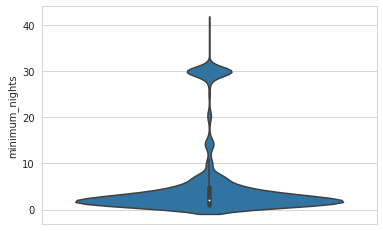

In [ ]:
ad = sns.violinplot(y = nights_40['minimum_nights'])

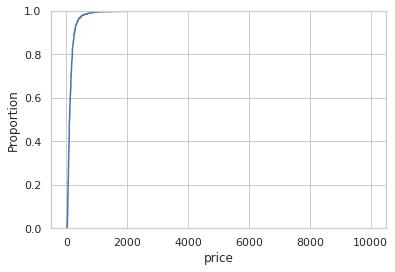

In [ ]:
sns.ecdfplot(x= airbnb['price'])

In [ ]:
#polar graph

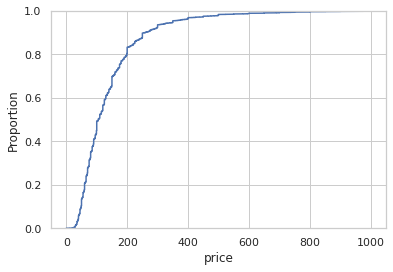

In [ ]:
sns.ecdfplot(x= price_1000['price'])

In [ ]:
#polar graph

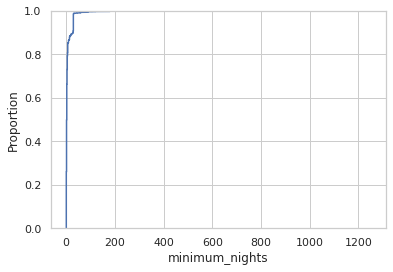

In [ ]:
sns.ecdfplot(x = airbnb['minimum_nights'])

In [ ]:
#polar graph

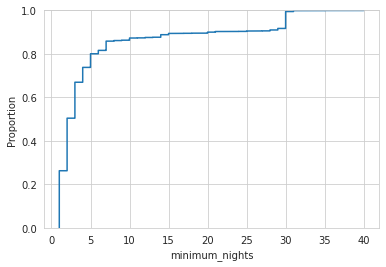

In [ ]:
sns.ecdfplot(x = nights_40['minimum_nights'])

In [ ]:
#polar graph

## A. Average price per room type

> In an <b>exploratory analysis</b> we studied how the data behaves in a cross way, that is, we seek to create hypotheses on the dependence of a given variable in relation to others, for example: How the income variable is affected in relation to people's color or with the schooling and so on. In this step we will find out what is the average price of reservations made available by <font color = "blue"><b> airbnb </b></font> in relation to the <b>room type</b>.

<font color = "red"><b>Note: </b></font>

> The column created with the percentage value, is how much the average price of the type of room represents in relation to the sum of all types of room, for example: black people represent <font color = "green"><b> 60%</b></font> of the population of Brazil.

<a id="preco_medio_tipo"></a>

In [ ]:
room_avg_pice = airbnb.groupby('room_type')['price'].mean().reset_index()
room_avg_pice['perc'] = room_avg_pice['price']*100/(room_avg_pice['price'].sum())

In [ ]:
room_avg_pice

,room_type,price,perc
0,Entire home/apt,211.794246,56.979459
1,Private room,89.780973,24.153967
2,Shared room,70.127586,18.866574


In [ ]:
#bar chart

In [ ]:
#polar chart

><i> We can conclude that the <b> Entire home / apt </b> type has an average price for reservations around <b> 211.79 dollars </b>, which represents <font color = "green"> <b> 56.97 % </b> </font> of all <b> types of rooms </b>. We have the <b> Entire home / apt </b> has an average price of <font color = "green"> <b> 32.82% </b> </font> more expensive than the <b> Private room </b> and <font color = "green"> <b> 38.11% </b> </font> more expensive than the <b> Shared room </b>.</i>

><i> Secondly, we have <b> Private room </b> which has an average booking price of around <b> 89.78 dollar</b>, which represents <font color = "green"><b> 24.15%</b></font> of all <b> types of rooms </b>. We have that the <b> Private room </b> has an average price <font color = "green"> <b>32.82%</b></font> less than <b>Entire home / apt</b> and <font color = "green"><b>5.29%</b></font> larger than the <b>Shared room</b>.</i>


><i> And lastly, <b> Shared room </b> which has an average booking price of around <b> 70.12 dollars </b>, which represents <font color = "green"> <b> 18.86% </b> </font> of all <b> types of rooms </b>. We have that the <b> Shared room </b> has an average price <font color = "green"> <b> 38.1% </b> </font> less than <b> Entire home / apt </b>  and <font color = "green"> <b> 5.29% </b> </font> smaller than the <b> Private room</b>.</i>

**Price behavior in relation to room types**

><i> In addition to obtaining information such as the average price for reservations, it is interesting to know how these values that resulted in the average are distributed, for this we will use visualization techniques such as <b>histograms</b> and <b>density graphs</b>.</i>

In [ ]:
entire_home = airbnb[(airbnb['room_type'] == 'Entire home/apt') & (airbnb['price'] <= 1000)]
private_room = airbnb[(airbnb['room_type'] == 'Private room') & (airbnb['price'] <= 1000)]
shared_room = airbnb[(airbnb['room_type'] == 'Shared room') & (airbnb['price'] <= 1000)]

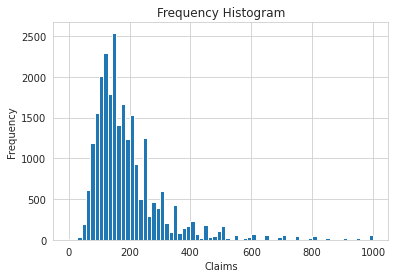

In [ ]:
#entire_home
plt.hist(entire_home['price'], bins=70, range=[0, 1000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

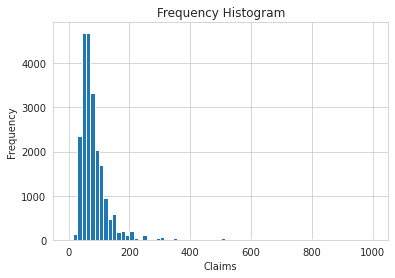

In [ ]:
#private_room
plt.hist(private_room['price'], bins=70, range=[0, 1000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

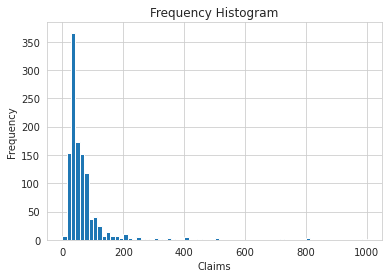

In [ ]:
#shared_room
plt.hist(shared_room['price'], bins=70, range=[0, 1000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

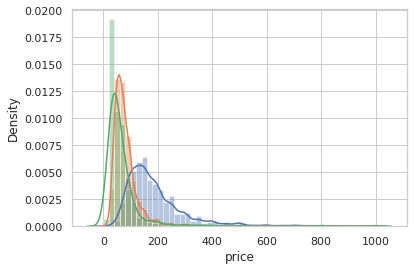

In [ ]:
sns.set_style('whitegrid')
sns.distplot(entire_home['price'], label = 'gfh' ,hist=True)
sns.distplot(private_room['price'], hist=True)
sns.distplot(shared_room['price'], hist=True)

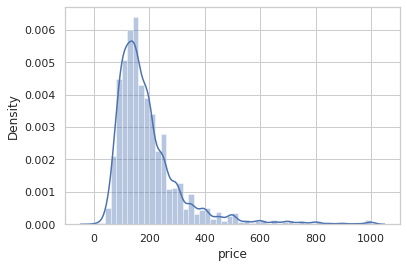

In [ ]:
sns.set_theme(style="whitegrid")
sns.distplot(entire_home['price'], hist=True)

In [ ]:
# #private_room
# plt.hist(private_room['price'], bins=70, range=[0, 1000])
# plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

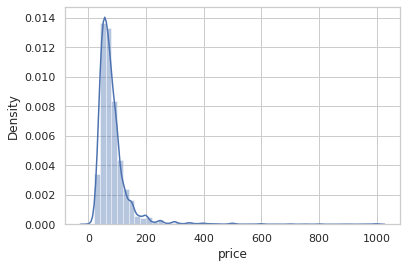

In [ ]:
sns.set_theme(style="whitegrid")
sns.distplot(private_room['price'], hist=True)

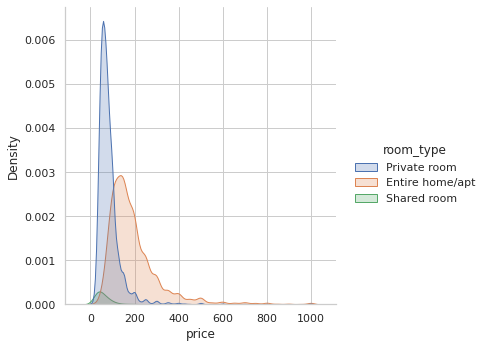

In [ ]:
sns.displot(airbnb, x=price_1000['price'], hue="room_type", kind="kde", fill=True)

## B. Price in Relation to Neighborhood

><i> With this analysis we will get some interesting answers, such as: What are the 10 most expensive neighborhoods to book on <font color = "blue"><b>airbnb</b></font>?, What are the 10 cheaper neighborhoods to book on <font color = "blue"><b>airbnb</b></font>? All this with very attractive and informative graphics for third parties, since in a data analysis it is very important the way in which you transmit the <b>information</b> that is hidden in the data.</i>

<a id = "bairro"></a>

### The 10 most expensive neighborhoods to book on airbnb

In [ ]:
most_expensiv_neighbourhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()
most_expensiv_neighbourhood = most_expensiv_neighbourhood.sort_values('price',ascending=False)
most_expensiv_neighbourhood = most_expensiv_neighbourhood.rename(columns = {'price': 'mean_price'})[0:10]

In [ ]:
most_expensiv_neighbourhood

,neighbourhood,mean_price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
157,Prince's Bay,409.500000
6,Battery Park City,367.557143
75,Flatiron District,341.925000
161,Randall Manor,336.000000
144,NoHo,295.717949


<BarContainer object of 10 artists>

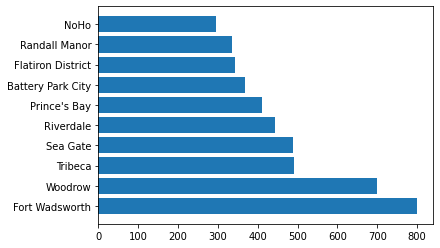

In [ ]:
x = most_expensiv_neighbourhood['neighbourhood']
y = most_expensiv_neighbourhood['mean_price']
plt.barh(x, y,)

In [ ]:
#polar graph

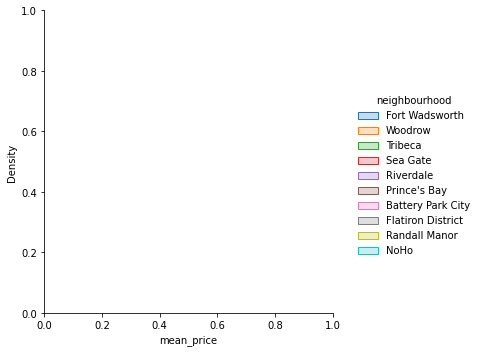

In [ ]:
sns.displot(most_expensiv_neighbourhood, x= most_expensiv_neighbourhood['mean_price'], hue='neighbourhood',kind="kde", fill=True)

><i> Assim como fizemos em <b>Price behavior in relation to room types</b>, vamos conhecer como está distribuido os preços dos 10 bairros com a maior média de preço para reservas no <font color = "blue"><b>airbnb</b></font>.</i>

### The 10 cheapest neighborhoods to book on airbnb

In [ ]:
cheapest_neighbourhood = airbnb.groupby('neighbourhood')['price'].mean().reset_index()
cheapest_neighbourhood = cheapest_neighbourhood.sort_values('price',ascending=True)
cheapest_neighbourhood = cheapest_neighbourhood.rename(columns = {'price': 'mean_price'})[0:10]

In [ ]:
cheapest_neighbourhood

<BarContainer object of 10 artists>

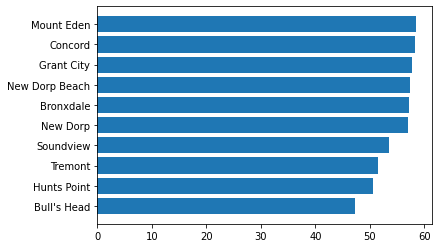

In [ ]:
x = cheapest_neighbourhood['neighbourhood']
y = cheapest_neighbourhood['mean_price']
plt.barh(x, y,)

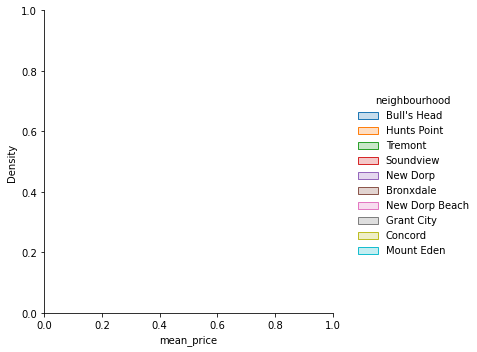

In [ ]:
sns.displot(cheapest_neighbourhood, x=cheapest_neighbourhood['mean_price'], hue="neighbourhood", kind="kde", fill=True)

## C. Geographic analysis

><i> In this analysis I will explore the behavior of the <b>price</b>, <b>neighborhood_group</b>, <b>minimum_nights</b> and <b>room_type</b> through the coordinated latitude and longitude available in the <font color = "blue"><b>airbnb</b></font> data. This type of exploitation is extremely useful for understanding the behavior of the data on a geographic scale, consequently helping in decision making.</i>

><i> All the graphics generated below are created using the <b>ggplot2</b> tool only. For analysis of this type, more powerful tools such as <b>plotly</b> can be used, which offer a lot of customized options for map generation.</i>

<a id = "mapeando"></a>

In [ ]:
#Geographic analysis

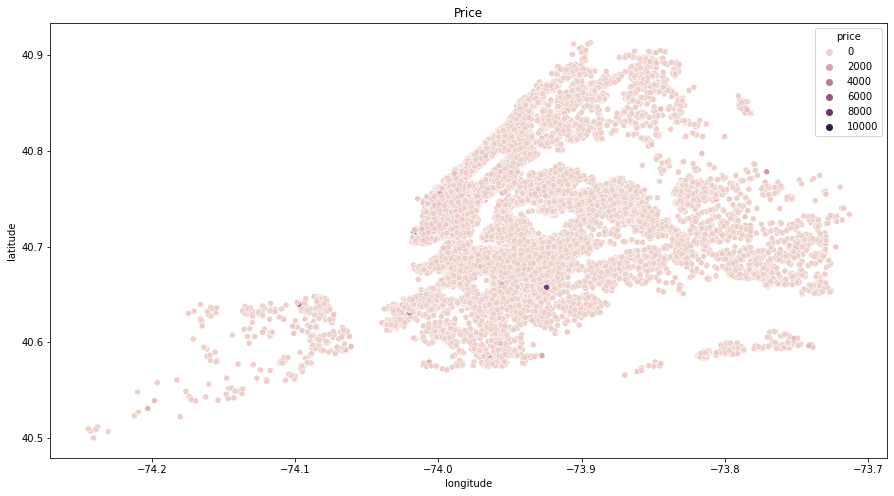

In [ ]:
#representing the hotel density in each 
plt.figure(figsize=(15,8))
visual4 = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.price)
plt.title('Price')
plt.show()
visual4

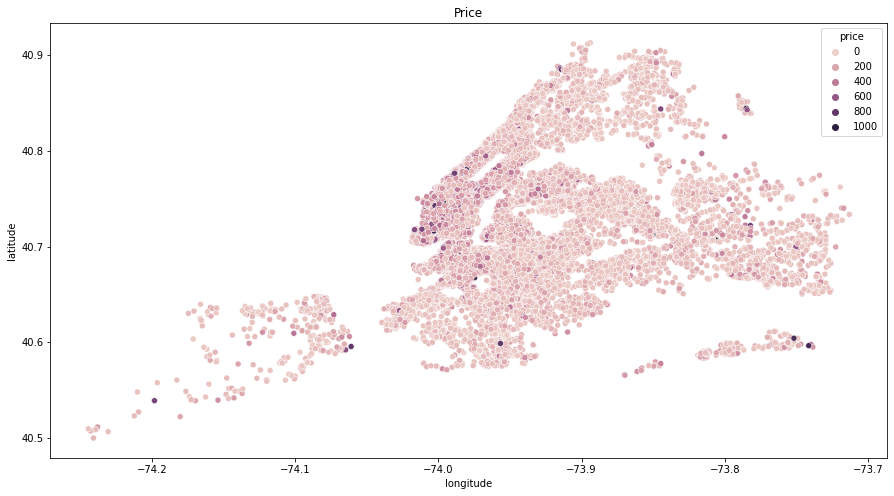

In [ ]:
#representing the hotel density in each 
plt.figure(figsize=(15,8))
visual4 = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=price_1000.price)
plt.title('Price')
plt.show()
visual4

><i> As our database prices are mostly below <b>73,470 dollars</b>, we will filter the data to obtain only bookings below <b>100 dollars</b>, helps to understand how this grouping behaves in relation to the coordinate.</i>

In [ ]:
price_100 = airbnb[airbnb['price'] <= 100]

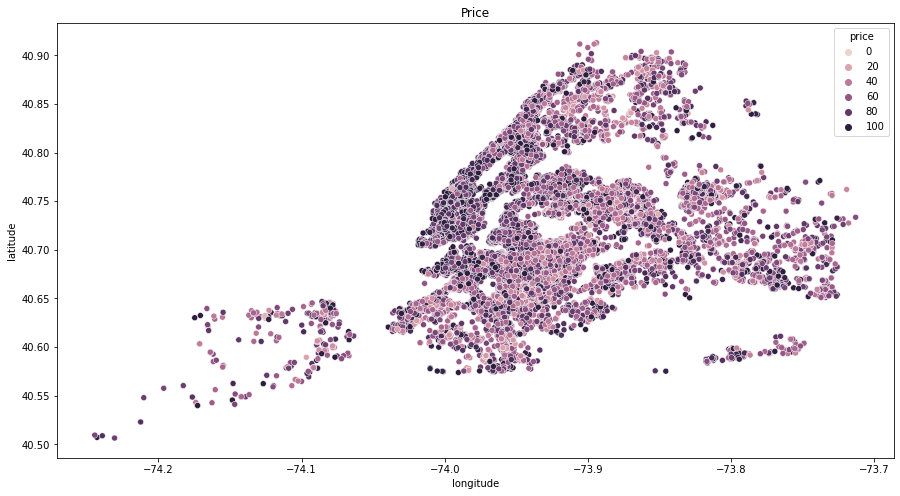

In [ ]:
#representing the hotel density in each 
plt.figure(figsize=(15,8))
visual4 = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=price_100.price)
plt.title('Price')
plt.show()
visual4

In [ ]:
#cylon graph

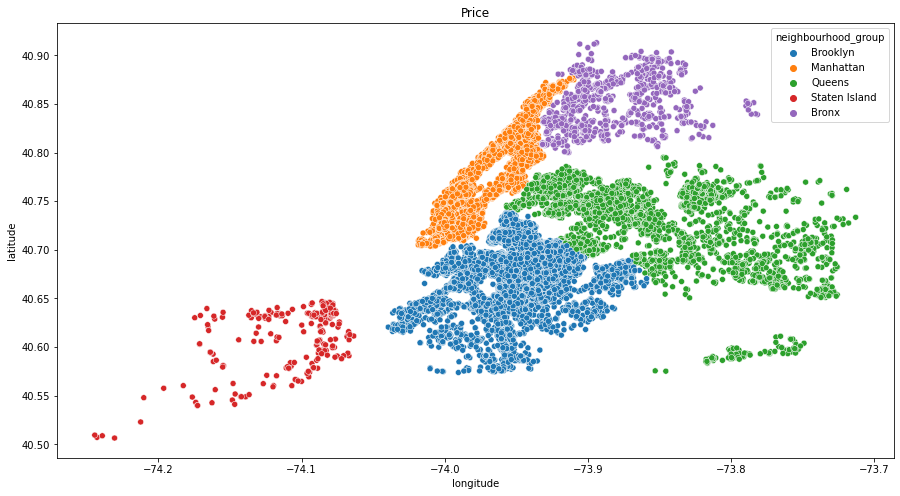

In [ ]:
#representing the hotel density in each 
plt.figure(figsize=(15,8))
visual4 = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=price_100.neighbourhood_group)
plt.title('Price')
plt.show()
visual4

In [ ]:
#cylon graph

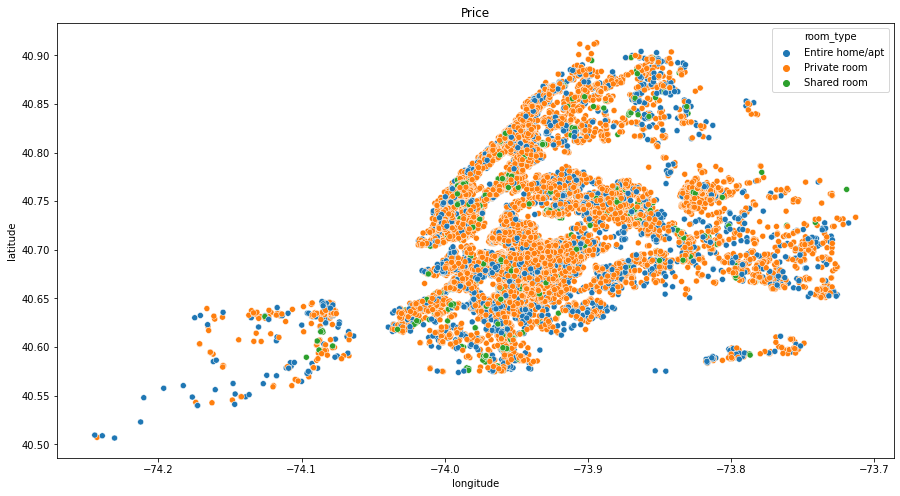

In [ ]:
#representing the hotel density in each 
plt.figure(figsize=(15,8))
visual4 = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=price_100.room_type)
plt.title('Price')
plt.show()
visual4

><i> With these visualizations, we can obtain some useful information for the analysis, but I will not go into details or try to find hypotheses for that. The goal is to explore the behavior of the attributes in relation to the latitude and longitude chains, but I recommend that you formulate your question and check if there is an answer in these graphs, or if your hypotheses that emerged during this analysis were right or wrong.</i>